<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

## K Nearest Neighbors - KNN Python Lecture

Hi Guys,<br>

Welcome to the K Nearest Neighbors with Python lecture. <br>

After the theory lecture, its time to learn by doing. <br>
Let's create a situation here, this time you got the data which is highly confidential! <br>
Your client does not want to disclose the hidden features (dimensions). All the features are coded with some numbers. So far, based on the combination of different feature's code, your client makes the decisions.<br>
Data is growing and your client wants to automate the process. You are give a task to use the coded data along with the target class in 'Results' column and help your client in decision making. <br>
You decide to go with the KNN and create a model that predicts the target class for the new customers. <br>
**Great, let's explore!**<br>

First thing first, let's imports the libraries that we need!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Coded_Data.csv")
df.head()

,Unnamed: 0,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


In our dataframe, the first column looks like the index, let's set `index_col = 0`

In [3]:
df = pd.read_csv("Coded_Data.csv",index_col=0)
df.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


Great, this looks fine now!<br>

Let's overview the data, we can use `info()` here!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Cd_1      1000 non-null float64
Cd_2      1000 non-null float64
Cd_3      1000 non-null float64
Cd_4      1000 non-null float64
Cd_5      1000 non-null float64
Cd_6      1000 non-null float64
Cd_7      1000 non-null float64
Cd_8      1000 non-null float64
Cd_9      1000 non-null float64
Cd_10     1000 non-null float64
Result    1000 non-null object
dtypes: float64(10), object(1)
memory usage: 93.8+ KB


Let's see how the data look like in a pairplot!<br>
*You can do more visualization using range of plotting options to learn more about the data. Our focus if machine learning here, so we can give a quick overview using parplot option!*

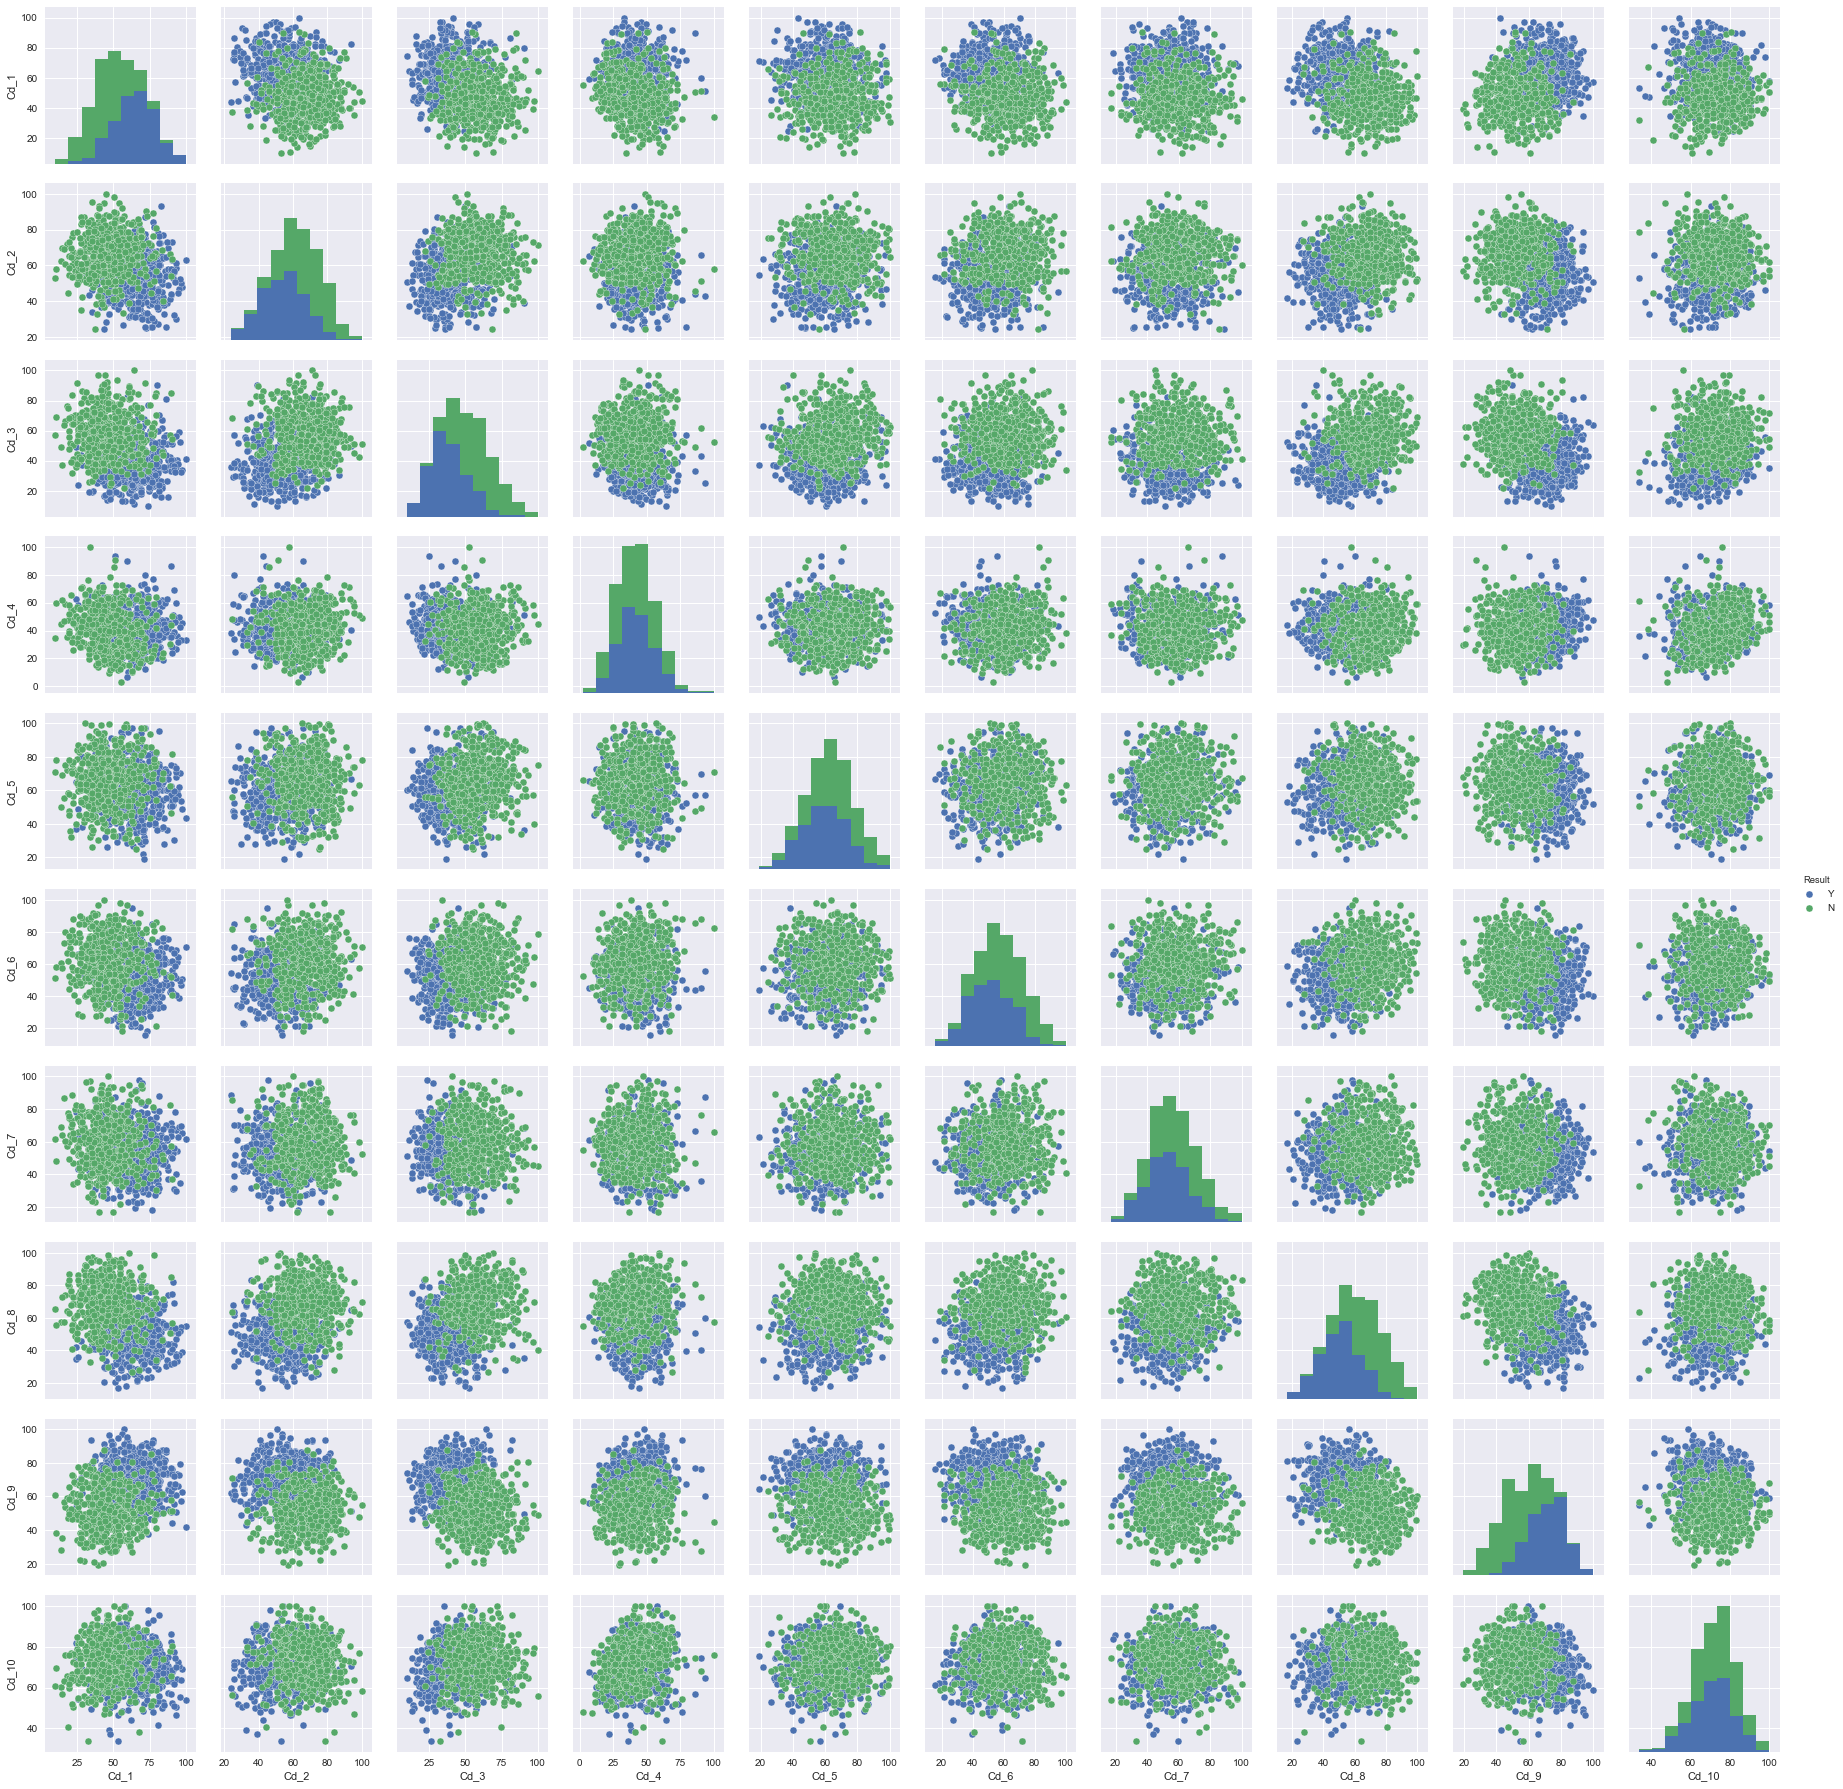

In [5]:
sns.pairplot(df, hue='Result')

## Variable Standardization
In the theory lecture on KNN, we have learned that the predictions are made by identifying the datapoints that are nearest to the test data point (majority voting based on the k value). In such situation, the scale of the features does matter. Variables with larger scale will have larger effect on the distance between the observations and also on the KNN classifier as compare to the variables on smaller scale.<br>

We need to do the **Standardization** of the variables first on the same scale to deal with this issue!<br>

Scikit-learn provides a built-in feature to do this all, Great!<br>

We need to import the `StandardScaler` from `Scikit-learn` and also need to create a `StandardScaler()` object (e.g. `scaler`).<br>
Let's do this!


[StackExchange](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn) Just give a look at this plots in this link to see how the standardized data look in a very simple example!

In [6]:
# Importing
from sklearn.preprocessing import StandardScaler
# Creating instance 'scaler'
scaler = StandardScaler()

Let's split the data so that we can fit the `scaler` to the features only!

In [7]:
#features and results/target
target = df['Result']
features = df.drop('Result',axis=1)

In [8]:
features.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9


In [9]:
target.head()

1    Y
2    N
3    N
4    Y
5    Y
Name: Result, dtype: object

Let's fit `scaler` to the features now!

In [10]:
# We can do this in a one line as well!
#scaler.fit(df.drop('Result',axis=1))
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

So, we have the fitted features to the `scaler` object. We will use this `scaler` object to transform all the features using `.transform()` method in `Scikit-learn` to do the `standardization` job by centering and scaling.<br>
Let's pass the features to `scaler.transform()` to get standardized features in `scaled_features`!

In [11]:
scaled_features = scaler.transform(features)

In [12]:
type(scaled_features)

numpy.ndarray

`scaled_features` is a NumPy array, Let's convert this into the pandas `DataFrame`!<br>
We can use our `df.columns` to get the columns name and pass that to `DatFrame()` along with `scaled_features`, note we don't need `Results` column, [:-1] will work *(everything but the last one)*!

In [13]:
cols = df.columns[:-1]
cols

Index(['Cd_1', 'Cd_2', 'Cd_3', 'Cd_4', 'Cd_5', 'Cd_6', 'Cd_7', 'Cd_8', 'Cd_9',
       'Cd_10'],
      dtype='object')

In [14]:
df_scaled_features = pd.DataFrame(scaled_features, columns=cols)#df.columns[:-1])
df_scaled_features.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10
0,-0.122525,0.187569,-0.911832,0.318653,-1.035516,-2.305940,-0.801865,-1.480070,-0.952562,-0.645366
1,-1.086028,-0.433403,-1.024151,0.624941,-0.445471,-1.153296,-1.131088,-0.200556,-1.826218,0.635103
2,-0.788651,0.337459,0.300034,0.753154,2.030007,-0.873275,2.597862,0.287761,-0.682756,-0.376282
3,0.983718,1.058359,-0.622166,0.624941,0.449771,-0.267648,1.751290,1.066595,1.244427,-1.025795
4,1.138354,-0.640394,-0.710839,-0.058864,0.822788,-0.938396,0.595651,-1.473889,1.038861,0.273232


<br>Our data is ready for the Machine Learning part now!
## Let's do the train_test split 
I am sure, you are very comfortable with this now!

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = scaled_features
y = target
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.30, random_state=42)
#keep the test_size and random_state same if you want to have the 
#same results as mine!

## KNN
Our focus is to come up with a model that can predict the class in `Result` for the new data point. We don't know what k number will work best, let's start with k = 1 at the moment. <br>
We need to import the `KNeighborsClassifier` from `sklearn.neighbors`.

In [17]:
from sklearn.neighbors import KNeighborsClassifier 

Let's Create a KNN model instance with n_neighbors=1

In [18]:
knn = KNeighborsClassifier(n_neighbors=1) 
#shift+tab to see the other options, we will only use n_neighbors

Let's fit this model to the training data, You know this all now!

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Let's do the predictions now!

In [20]:
predictions = knn.predict(X_test)

## Evaluation
As we already know, the evaluation is very important to know if the model is working fine or not! <br>
Let's see how the confusion matrix and classification report look like!

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[134   8]
 [ 12 146]]
             precision    recall  f1-score   support

          N       0.92      0.94      0.93       142
          Y       0.95      0.92      0.94       158

avg / total       0.93      0.93      0.93       300



So, this does not look very bad. We have used k = 1 only. Let's explore if we can improve the model using some better value of k. <br>
## Elbow method to chose the k value
To do this, we can use the elbow method to find out the good value for k.<br>
We will actually iterate a range of knn models using different k values (k from 1 to 30 in this case) in this process. We will get the error rate for every k value and plot against k to find out its optimum value. 

In [23]:
# Initializing an empty list to get the error rate for every k 
err_rate = []

# Let's run the for loop for k from 1 to 30, we can use range() method
for i in range(1,30):
    
    # Initializing knn for k = i
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fitting knn 
    knn.fit(X_train,y_train)
    
    # predicting for k = i
    prediction_i = knn.predict(X_test)
    
    # error rate for k = i - appending to the list 'err_rate'
    # Avg of predictions and y_test if both not equal
    err_rate.append(np.mean(prediction_i != y_test))

Let's plot the error rate Vs k to see which value have the lowest error rate!

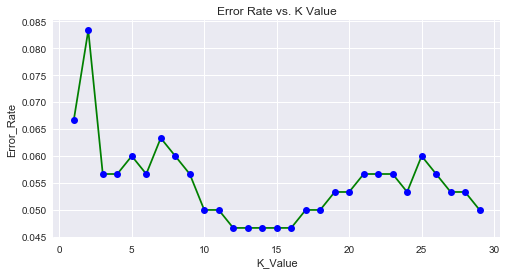

In [24]:
plt.figure(figsize=(8,4))
plt.plot(range(1,30),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

Looks like our model can perform better. The plot above shows that the error rate is minimum for k >= 12. This remains same till k = 16 and then bounces with some random number!<br>
We can select the k = 12 and see if the model works better than k = 1.

In [25]:
# Let see what it was for k = 1 (n_neighbors=1) to compare!
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('For K=1')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

For K=1
[[134   8]
 [ 12 146]]
             precision    recall  f1-score   support

          N       0.92      0.94      0.93       142
          Y       0.95      0.92      0.94       158

avg / total       0.93      0.93      0.93       300



In [26]:
# Let's set k=12 (n_neighbors=12)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('For k=12')
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

For k=12
[[136   6]
 [  8 150]]
             precision    recall  f1-score   support

          N       0.94      0.96      0.95       142
          Y       0.96      0.95      0.96       158

avg / total       0.95      0.95      0.95       300



So, it was worth finding the optimum value for k, our model is performing better. 
## Great Job!
Let's move on to the project exercise now to practice the skills in knn!